In [8]:
import numpy as np
import seaborn as sns

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [9]:
from matplotlib import pyplot as plt


def plot_2d_cluster(X, model, columns = ['X', 'Y']):
    means = model.cluster_centers_
    ax = sns.scatterplot(X[columns[0]], X[columns[1]], c=vectorizer(model.labels_))
    ax = sns.scatterplot(means[:, 0], means[:, 1], ec='red', legend=False, ax=ax)
    plt.show()

In [10]:
import pandas as pd

adult_dataset = pd.read_csv('./data/adult.csv', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
adult_dataset_numeric = adult_dataset[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [12]:
adult_dataset_numeric.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [13]:
adult_dataset_numeric.isna().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

<Axes: >

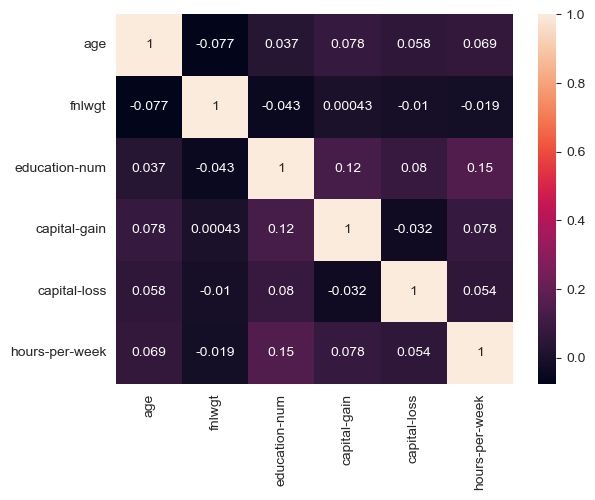

In [14]:
sns.heatmap(adult_dataset_numeric.corr(), annot=True)

/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_11127/453718397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


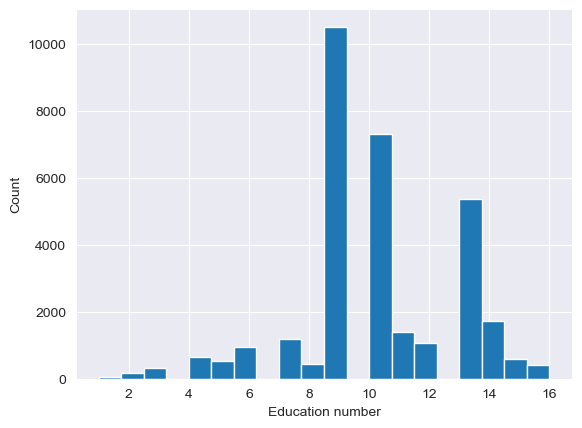

In [15]:
sns.distplot(
    adult_dataset_numeric['education-num'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Education number', ylabel='Count');

/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_11127/3747723933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


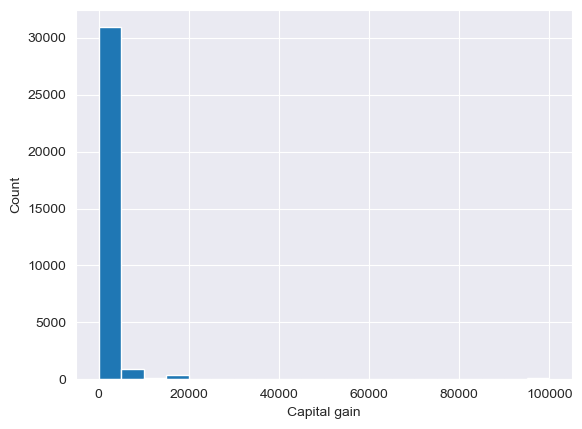

In [16]:
sns.distplot(
    adult_dataset_numeric['capital-gain'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Capital gain', ylabel='Count');

/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_11127/350988361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


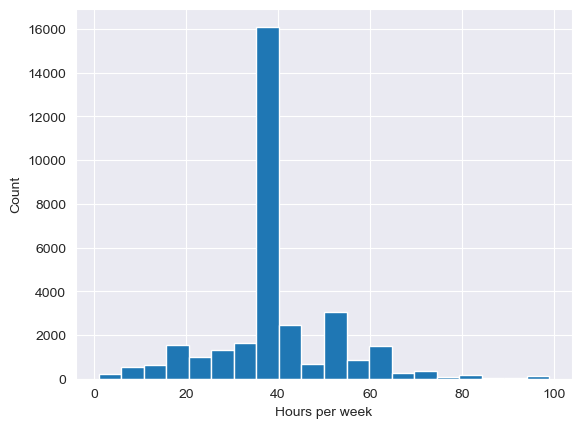

In [17]:
sns.distplot(
    adult_dataset_numeric['hours-per-week'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Hours per week', ylabel='Count');

- There are no nan / null values in the dataset
- There is a slight collelation (0.12) between education-num and capital-gain. This is expected as people with higher education tend to have higher income and hence higher capital-gain.
- There is a slight correlation (0.15) between education-num and hours-per-week. This is expected as people with higher education tend to work more hours per week.
- Capital gain is mostly centered around the average / median income as expected.
- hours per week is also as expected peaking around 40 hours per week

Based on above observations, we are be-able to start with a scatteplot to display the education-num and capital-gain. As these have the highest correlations.

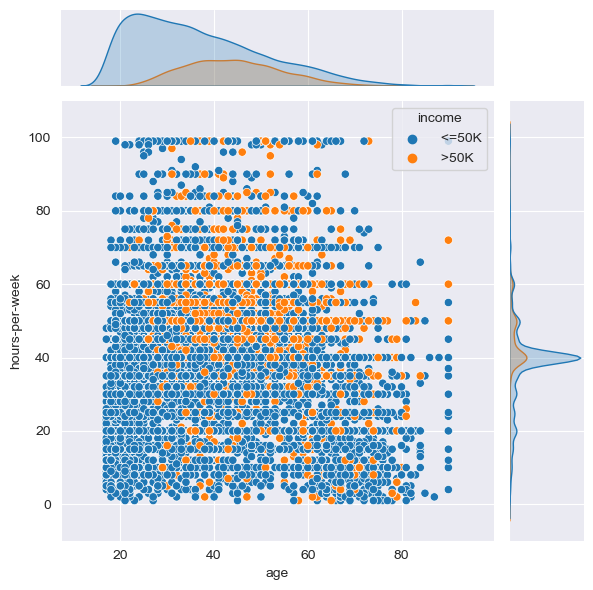

In [18]:
from sklearn.discriminant_analysis import StandardScaler


#adult_dataset_numeric_scaled = pd.DataFrame(StandardScaler().fit_transform(adult_dataset_numeric), columns=adult_dataset_numeric.columns)
sns.jointplot(x=adult_dataset['age'], y=adult_dataset['hours-per-week'], hue=adult_dataset['income']);


In [ ]:
from sklearn.preprocessing import MinMaxScaler


adult_dataset_scaled = pd.DataFrame(adult_dataset_numeric, columns=adult_dataset_numeric.columns)
adult_dataset_scaled['income'] = adult_dataset['income']
sns.pairplot(adult_dataset_scaled, hue='income')

In [ ]:
data_set_selection = adult_dataset_numeric[['age', 'hours-per-week']]
sns.scatterplot(x=data_set_selection['age'], y=data_set_selection['hours-per-week'])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
analysis_data = adult_dataset_numeric[['capital-gain', 'age', 'hours-per-week']]
min_max_scaled_adult = pd.DataFrame(MinMaxScaler().fit_transform(analysis_data), columns=analysis_data.columns)
ax.scatter(min_max_scaled_adult['capital-gain'], min_max_scaled_adult['age'], min_max_scaled_adult['hours-per-week'], edgecolor='k')

ax.set_xlabel('Capital gain')
ax.set_ylabel('Age')
ax.set_zlabel('Hours per week')

## Seeds dataset

In [ ]:
seeds_dataset = pd.read_csv('./data/Seed_Data.csv', header=None, skiprows=1, names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class'])
seeds_dataset.head()

In [ ]:
seeds_dataset.shape

In [ ]:
seeds_dataset_numeric = seeds_dataset[['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove']]
seeds_dataset_numeric.isnull().sum()

In [ ]:
seeds_dataset_numeric.isna().sum()

In [ ]:
sns.heatmap(seeds_dataset_numeric.corr(), annot=True)

In [ ]:
sns.pairplot(seeds_dataset, hue='class')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


In [ ]:
seeds_dataset_numeric_scaled = pd.DataFrame(MinMaxScaler(feature_range=[-1, 1]).fit_transform(seeds_dataset_numeric), columns=seeds_dataset_numeric.columns)
sns.scatterplot(x=seeds_dataset_numeric_scaled['area'], y=seeds_dataset_numeric_scaled['perimeter'], hue=seeds_dataset['class']);

In [ ]:

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(seeds_dataset_numeric_scaled['area'], seeds_dataset_numeric_scaled['perimeter'], seeds_dataset_numeric_scaled['length of kernel'],c=seeds_dataset['class'], edgecolor='k')

ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')


In [ ]:
data_for_rq1 = seeds_dataset[['area', 'perimeter', 'class']]
data_for_rq1.head()

In [ ]:
data_for_rq1.to_csv('./data/seeds-dataset/rq1.csv')

In [ ]:
data_for_rq2 = seeds_dataset[['area', 'perimeter', 'length of kernel', 'class']]
data_for_rq2.head()

In [ ]:
data_for_rq2.to_csv('./data/seeds-dataset/rq2.csv')

## Diabetes

In [ ]:
diabeters_dataset = pd.read_csv('./data/ObesityDataSet_raw_and_data_sinthetic.csv')
diabeters_dataset.info()

In [ ]:
diabeters_dataset_numeric = diabeters_dataset[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']]
diabeters_dataset_numeric.isnull().sum()

In [ ]:
diabeters_dataset_numeric.isna().sum()

In [ ]:
sns.pairplot(diabeters_dataset_numeric, hue='NObeyesdad')

In [ ]:
twod_cluster_columns = ['Height', 'Weight']
twod_cluster_columns_data = diabeters_dataset_numeric[twod_cluster_columns]
sns.scatterplot(x=twod_cluster_columns_data['Height'], y=twod_cluster_columns_data['Weight'], hue=diabeters_dataset_numeric['NObeyesdad']);

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categories = le.fit_transform(diabeters_dataset_numeric['NObeyesdad'])
categories

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(diabeters_dataset_numeric['Height'], diabeters_dataset_numeric['Weight'], diabeters_dataset_numeric['Age'], c=categories, edgecolor='k')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Age')


## Breast cancer

In [ ]:
adult_dataset = pd.read_csv('./data/adult.csv')
adult_dataset.head()

In [ ]:
breastcancer_dataset.info()